In [ ]:
!pip install -U sklearn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as m

In [ ]:
data = pd.read_csv('comments_user.csv', encoding='cp1252')

In [ ]:
plt.figure(figsize=(7, 7))
sns.countplot(x='v1', data=data)
plt.xlabel('SMS Type')
plt.ylabel('SMS Count')
plt.show()

In [ ]:
sms_v1 = data.iloc[:,[0]]['v1']

In [ ]:
sms = data.iloc[:,[1]]['v2']

In [ ]:
le=LabelEncoder()
sms_type=le.fit_transform(sms_v1)

5572

In [ ]:
sms_content = []
for m in sms:
  sms_content.append(m)

['R', 'o', 'f', 'l', '.', ' ', 'I', 't', 's', ' ', 't', 'r', 'u', 'e', ' ', 't', 'o', ' ', 'i', 't', 's', ' ', 'n', 'a', 'm', 'e']


In [ ]:
cv=CountVectorizer(max_features=5400)

In [ ]:
features=cv.fit_transform(sms_content)
features=features.toarray()

In [ ]:
feature_train,feature_test,label_train,label_test=train_test_split(features,sms_type,test_size=0.2,random_state=7)

In [ ]:
model=SVC(kernel='linear')
model.fit(feature_train,label_train)

SVC(kernel='linear')

In [ ]:
label_pred=model.predict(feature_test)


In [ ]:
m.accuracy_score(label_test,label_pred)


0.9847533632286996

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       970
           1       0.98      0.90      0.94       145

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
print(m.confusion_matrix(label_test,label_pred))


[[967   3]
 [ 14 131]]


In [ ]:
def is_safe(prediction):
  if not prediction:
    return 'safe'
  elif prediction:
    return 'scam'

In [ ]:
result_data = []
for sms in sms_content:
  mess = cv.transform([sms]).toarray()
  res = model.predict(mess)
  result_data.append([sms, is_safe(res)])

df_result = pd.DataFrame(result_data, columns=['comment', 'type'])
df_result

,comment,type
0,"Go until jurong point, crazy.. Available only ...",safe
1,Ok lar... Joking wif u oni...,safe
2,Free entry in 2 a wkly comp to win FA Cup fina...,scam
3,U dun say so early hor... U c already then say...,safe
4,"Nah I don't think he goes to usf, he lives aro...",safe
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,scam
5568,Will Ì_ b going to esplanade fr home?,safe
5569,"Pity, * was in mood for that. So...any other s...",safe
5570,The guy did some bitching but I acted like i'd...,safe


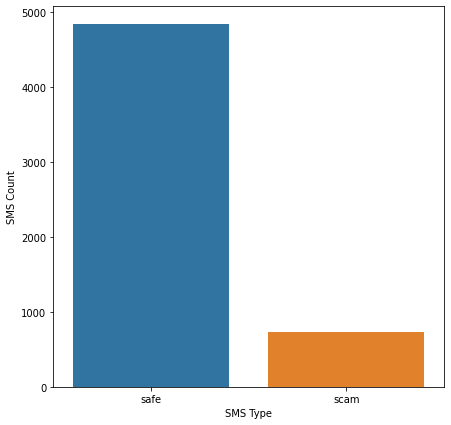

In [ ]:
plt.figure(figsize=(7, 7))
sns.countplot(x='type', data=df_result)
plt.xlabel('SMS Type')
plt.ylabel('SMS Count')
plt.show()